# SQLLineage
`pip install sqllineage`

In [15]:
from sqllineage.runner import LineageRunner

# Create Dummy Quries
sql = "insert into db1.table11 select * from db2.table21 union select * from db2.table22;"

# Parse SQL
result = LineageRunner(sql)

In [16]:
# Get Source Table
[str(x) for x in result.source_tables]

['db2.table21', 'db2.table22']

In [17]:
# Get Target Table
[str(x) for x in result.target_tables]

['db1.table11']

# NetworkX
`pip install networkx`

In [115]:
import networkx as nx
import matplotlib.pyplot as plt

# Create Graph Object
G = nx.DiGraph()

In [56]:
# Add Node and Edge
G.add_node(1)
G.add_edge(1, 2)
G.add_edge(2, 5)
G.add_edge(3, 4)
G.add_edge(4, 5)

In [116]:
# Similar to this
G.add_edges_from([(1, 2), (2, 5), (3, 4), (4, 5)])

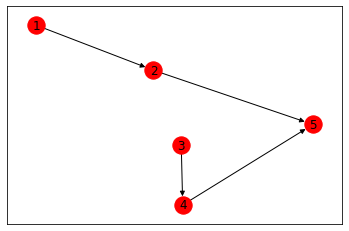

In [117]:
nx.draw_networkx(G, arrows=True, node_color= 'red')
plt.show()

In [88]:
# Get Upstream of Node 2
nx.bfs_tree(G, source= 2, reverse= True).nodes()

NodeView((2, 1))

In [89]:
# Get Downstream of Node 4
nx.bfs_tree(G, source= 4, reverse= False).nodes()

NodeView((4, 5))

In [90]:
# Save network into a gpickle file
nx.write_gpickle(G, "simple.gpickle")

In [91]:
# Read network from a gpickle file
T = nx.read_gpickle("simple.gpickle")

# Generate SQL Dependencies Network

In [143]:
from sqllineage.runner import LineageRunner
import networkx as nx
from glob import glob

# Create a Graph Object
G = nx.DiGraph()

# Loop all query files
for i in glob('query/*.sql') :
    # Parse query file into SQLLineage
    with open(i) as f : sql = f.read()
    result = LineageRunner(sql)
    # Put Source->Target into Graph's edge
    draft_edges= [(str(x), str(y)) for x in result.source_tables for y in result.target_tables]
    G.add_edges_from(draft_edges)

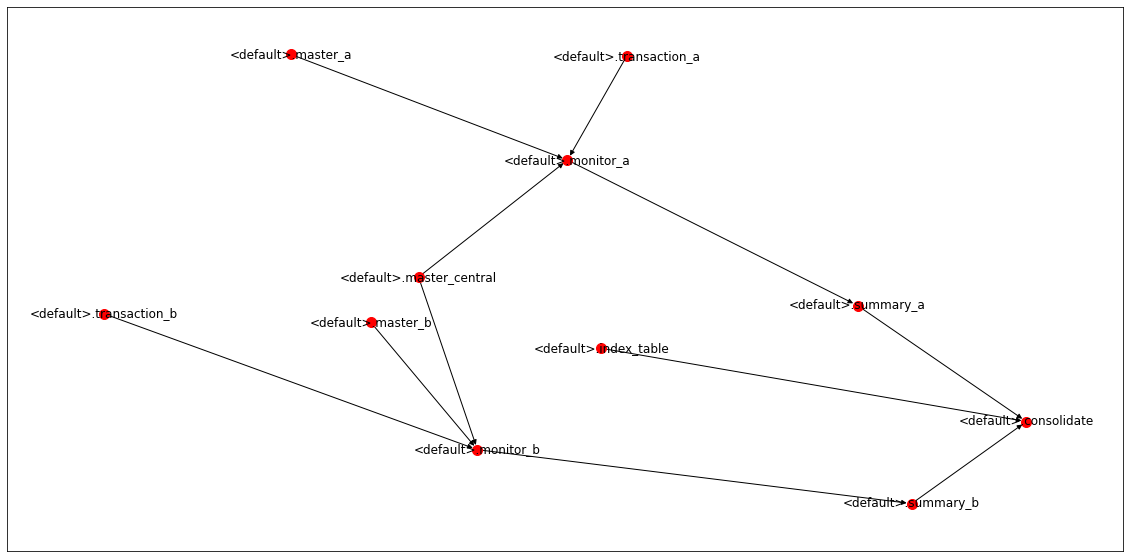

In [154]:
fig, ax = plt.subplots(figsize= (20,10))
G.graph['graph'] = dict(rankdir="LR")

nx.draw_networkx(G, arrows=True, node_color= 'red', node_size= 100)
plt.show()

# Get Related Table

In [156]:
nx.bfs_tree(G, source= '<default>.transaction_a', reverse= False).nodes()

NodeView(('<default>.transaction_a', '<default>.monitor_a', '<default>.summary_a', '<default>.consolidate'))

In [155]:
nx.bfs_tree(G, source= '<default>.summary_b', reverse= True).nodes()

NodeView(('<default>.summary_b', '<default>.monitor_b', '<default>.master_b', '<default>.master_central', '<default>.transaction_b'))